In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
'''
# From local
mnist_dataframe = pd.read_csv(
  "c://Users//bé//Downloads//mnist_train_small.csv",
  sep=",",
  header=None)
'''

# From online
mnist_dataframe = pd.read_csv(
    "https://raw.githubusercontent.com/bbalazs88/Sample_Files/master/mnist_train_small.csv",
    sep=",",
    header=None)

In [3]:
# Use just the first 12,000 records for training/validation.
mnist_dataframe = mnist_dataframe.head(12000)

# Randomize the samples
# mnist_dataframe = mnist_dataframe.reindex(np.random.permutation(mnist_dataframe.index))

In [4]:
# First 10.000 rows for train/test, next 2000 for evaluate

labels = mnist_dataframe.loc[0:9999, 0]
features = mnist_dataframe.loc[0:9999, 1:784]

labels_evaluate = mnist_dataframe.loc[10000:11999, 0]
features_evaluate = mnist_dataframe.loc[10000:11999, 1:784]

print(labels.count(), '- labels \n', labels_evaluate.count(), '- labels to evaluate \n',
     features.shape[0], '- features \n', features_evaluate.shape[0], '- features to evaluate')


10000 - labels 
 2000 - labels to evaluate 
 10000 - features 
 2000 - features to evaluate


In [5]:
# Look into the labels

labels[0:10]

0    6
1    5
2    7
3    9
4    5
5    2
6    0
7    6
8    5
9    5
Name: 0, dtype: int64

In [6]:
# Look into the features
features[0:5]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Because we need 10 categories for the ten possible outcomes, one-hot-encoding needed.

encoded = to_categorical(labels)
encoded_evaluate = to_categorical(labels_evaluate)

print(labels[0])
print(encoded[0], '\n')
print("One-hot-encoding visualize.")

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 

One-hot-encoding visualize.


### HPO:

#### Dense layers: First I tried two layers with 50-50 neurons. The best accuracy was around 70%. With 512 neurons in each layer, it was worse. With 50-50-60 neuron layers - so I added another layer - the best score was achieved, arounc 90%.

#### Batch_size: The default is 32. I changed to 1, which is really slow, and not accurate. We could go bigger than the default, but not too big, my choice was 150.

#### Optimizer: TODO - try parameters for this.

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3060      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                610       
Total params: 45,470
Trainable params: 45,470
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 7000 samples, validate on 3000 samples
Epoch 1/30
7000/7000 [==============================] - 2s 241us/step - loss: 8.3904 - acc: 0.4179 - v

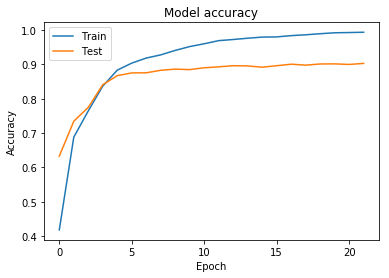

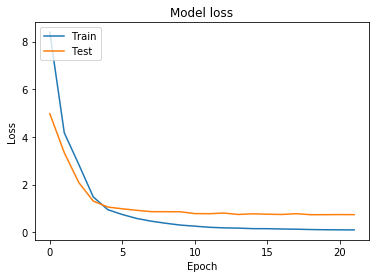

In [8]:
early_stopping_monitor = EarlyStopping(patience=3)

# PyCharm -> model.Sequential()
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784, )))
model.add(Dense(50, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(features, encoded, epochs=30, batch_size=150, validation_split=0.3, callbacks=[early_stopping_monitor])

# Plot the accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(features_evaluate, encoded_evaluate)
print('\nTest Accuracy:', test_acc)

2000/2000 [==============================] - 0s 65us/step

Test Accuracy: 0.9065



The prediction is: 9
And the answer is: 9


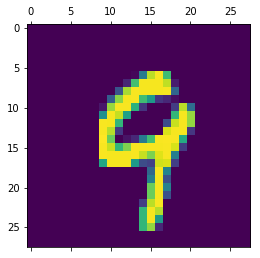

In [10]:
# Random számot generálunk az evaluate adat 2000 sorából, így könnyebb léptetni.
# TODO: csinálni egy loopot, ami predictel 50 számot, és az eredményeket, és a képeket is kinyomtatja.

rand = np.random.randint(0, 2000)
rand

prediction = model.predict([[features_evaluate.iloc[rand]]])
print('\nThe prediction is:', prediction.argmax())
print("And the answer is:", labels_evaluate.iloc[rand])

# Itt nem kellett belekeverni a (-1, 28, 28, 1)-et, mert csak két paramétert vár a matshow.
plt.matshow(features_evaluate.iloc[rand].values.reshape(28,28))
plt.show()

## Egyéb próbálkozások:

In [11]:
# Példa arra, hogy hogy néz ki az adat.

features_evaluate.iloc[0:2, 590:610]

,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
10000,0,0,0,0,0,0,0,9,124,180,254,242,129,17,0,0,0,0,0,0
10001,0,0,0,0,0,16,169,212,254,254,254,254,251,126,48,0,0,0,0,0


In [12]:
# Ha  model.predict(features_evaluate.iloc[45])-et adom be, ergo Seriest kap, de list-et vár, amit megold a [[]].
# Kinyomtattam a különbséget a kettő között.

print(type(features_evaluate.iloc[45]))
print(type([[features_evaluate.iloc[45]]]))

<class 'pandas.core.series.Series'>
<class 'list'>


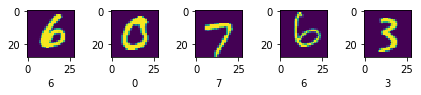

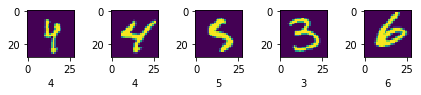

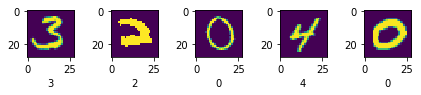

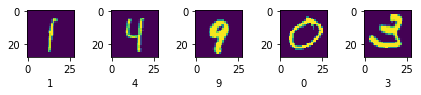

In [13]:
# Visalize the prediction. Not the nicest solution, but it works.

for i in range(0, 4):
    prediction = model.predict([[features_evaluate.iloc[rand]]])  

    f, axarr = plt.subplots(1, 5)
    f.tight_layout()
        
    rand = np.random.randint(0, 2000)
    prediction = model.predict([[features_evaluate.iloc[rand]]])
    axarr[0].set(xlabel=prediction.argmax())
    axarr[0].imshow(features_evaluate.iloc[rand].values.reshape(28,28))
    
    rand = np.random.randint(0, 2000)
    prediction = model.predict([[features_evaluate.iloc[rand]]])
    axarr[1].set(xlabel=prediction.argmax())
    axarr[1].imshow(features_evaluate.iloc[rand].values.reshape(28,28))
    
    rand = np.random.randint(0, 2000)
    prediction = model.predict([[features_evaluate.iloc[rand]]])
    axarr[2].set(xlabel=prediction.argmax())
    axarr[2].imshow(features_evaluate.iloc[rand].values.reshape(28,28))
    
    rand = np.random.randint(0, 2000)
    prediction = model.predict([[features_evaluate.iloc[rand]]])
    axarr[3].set(xlabel=prediction.argmax())
    axarr[3].imshow(features_evaluate.iloc[rand].values.reshape(28,28))
   
    rand = np.random.randint(0, 2000)
    prediction = model.predict([[features_evaluate.iloc[rand]]])
    axarr[4].set(xlabel=prediction.argmax())
    axarr[4].imshow(features_evaluate.iloc[rand].values.reshape(28,28))

    plt.show()